# Just Another Movie Recommendation System


---
Oleh: [Abraham Naiborhu](https://www.dicoding.com/users/abrahampn)

*Proyek Final - Dicoding Machine Learning Terapan*

## Pendahuluan
Proyek ini membahas topik rekomendasi sistem, terkhususnya untuk merekomendasikan film kepada users. Dataset ini diambil dari kaggle:  https://www.kaggle.com/aigamer/movie-lens-dataset

Sistem rekomendasi yang digunakan disini adalah content dan collaborative based filtering
* Pada Content Based Filter, kita akan menggunakan genre sebagai pusat dari sistem rekomendasi

* Pada Collaborative Based Filter, kita akan menggunakan rating dari pengguna





## Data and Libraries Preparation

Saat menggunakan Opendatasets, diharapkan pengguna menyiapkan kaggle (karena dataset dari kaggle) username dan kaggle key

In [1]:
!pip install opendatasets

import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Setelah importing libraries, waktunya mempersiapkan dataset

In [2]:
od.download("https://www.kaggle.com/aigamer/movie-lens-dataset")
df_movie = pd.read_csv("/content/movie-lens-dataset/movies.csv")
df_rating = pd.read_csv("/content/movie-lens-dataset/ratings.csv")
df_tags = pd.read_csv("/content/movie-lens-dataset/tags.csv")
df_links = pd.read_csv("/content/movie-lens-dataset/links.csv")

Skipping, found downloaded files in "./movie-lens-dataset" (use force=True to force download)


## Data Understanding
Bagian ini akan menjelaskan mengenai karakteristik dari dataset yang didapatkan.


Pada dataset ini, terdapat empat file csv yang kelak akan digunakan untuk pembuatan model. Ke empat file tersebut adalah: links.csv, ratings.csv, movies.csv, and tags.csv

There are a total of 9742 Movie's in our dataset with 100836 Users Rating the movie and 3683 Tags.
* userId: Unique Id provided for each User
  * userId were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

* movieId: Unique Id provided for each Movie
  * Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL Movie Lens. Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

* rating (rating.csv): Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
  * All Ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user
  * Mean show the average rating is 3.2-Star
  
* genres: Genres are a pipe-separated list, and are selected from the following:
  * Action
  * Adventure
  * Animation
  * Children's
  * Comedy
  * Crime
  * Documentary
  * Drama
  * Fantasy
  * Film-Noir
  * Horror
  * Musical
  * Mystery
  * Romance
  * Sci-Fi
  * Thriller
  * War
  * Western
  * (no genres listed)

### All About df_Movie

In [3]:
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
df_movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### All About df_rating

In [6]:
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
print('Bintang yang diberikan: ', df_rating.rating.unique())

Bintang yang diberikan:  [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [9]:
df_rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### All About df_tags

In [10]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [11]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [12]:
df_tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### All About df_links

In [13]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [14]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [15]:
df_links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


### Summary of All Data

Setelah penelusuran diatas, kita mengetahui bahwa data yang akan digunakan hanya berdasarkan dari dua file, yaitu rating.csv dan file movie.csv, file-file lainnya tidak akan kita gunakan. Kemudian, setelah melihat hasil dari kedua file, kita dapat menyimpulkan variable variabe yang akan digunakan adalah sebagai berikut:

* movie.csv
  * MovieID: Data ID Film (int64)
  * Title: Judul Film (Object)
  * Genres: Genre Film (Object)

* rating.csv
  * UserID: Data ID pengguna (int64)
  * MoveID: Data ID Film (int64)
  * Rating: Penilaian pengguna terhadap film (float64)
  * Timestamp: timestamp (int64)

Note: Penjelasan lebih mendetail mengenai variabel ada di pembukaan sub bab ini

In [16]:
#Perbedaan Jumlah film di masing-masing file data
print('Jumlah Film di df_movie: ', len(df_movie.movieId.unique()))
print('Jumlah Film di df_rating: ', len(df_rating.movieId.unique()))
print('Jumlah Film di df_tags: ', len(df_tags.movieId.unique()))
print('Jumlah Film di df_links: ', len(df_links.movieId.unique()))
print('\n')

#Perbedaan jumlah film di masing-masing file data
print('Jumlah User di df_rating', len(df_rating.userId.unique()))
print('Jumlah User di df_tags', len(df_tags.userId.unique()))

Jumlah Film di df_movie:  9742
Jumlah Film di df_rating:  9724
Jumlah Film di df_tags:  1572
Jumlah Film di df_links:  9742


Jumlah User di df_rating 610
Jumlah User di df_tags 58


In [17]:
# Mengecek jumlah user
user_all = np.concatenate((
    df_rating.userId.unique(),
    df_tags.userId.unique(),
))

user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user berdasarkan placeID: ', len(user_all))

Jumlah seluruh user berdasarkan placeID:  610


In [18]:
# Mengecek jumlah Movie
movie_all = np.concatenate((
    df_movie.movieId.unique(),
    df_rating.movieId.unique(),
    df_links.movieId.unique()
))

movie_all = np.sort(np.unique(movie_all))
print('Jumlah seluruh movie berdasarkan moveId: ', len(movie_all))

Jumlah seluruh movie berdasarkan moveId:  9742


In [19]:
# Memisahkan column tahun untuk visualisasi tahun
df_movie['year'] = df_movie['title'].str.extract('(\(\d+\))')
df_movie['year'] = df_movie['year'].str.extract('(\d+)').astype(float)
df_movie = df_movie.sort_values( by = 'year', ascending = False)
df_movie

,movieId,title,genres,year
9698,184997,"Love, Simon (2018)",Comedy|Drama,2018.0
9701,185033,I Kill Giants (2018),Drama|Fantasy|Thriller,2018.0
9686,184015,When We First Met (2018),Comedy,2018.0
9712,188189,Sorry to Bother You (2018),Comedy|Fantasy|Sci-Fi,2018.0
9711,187717,Won't You Be My Neighbor? (2018),Documentary,2018.0
...,...,...,...,...
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN
9518,171749,Death Note: Desu nôto (2006–2007),(no genres listed),NaN
9525,171891,Generation Iron 2,(no genres listed),NaN


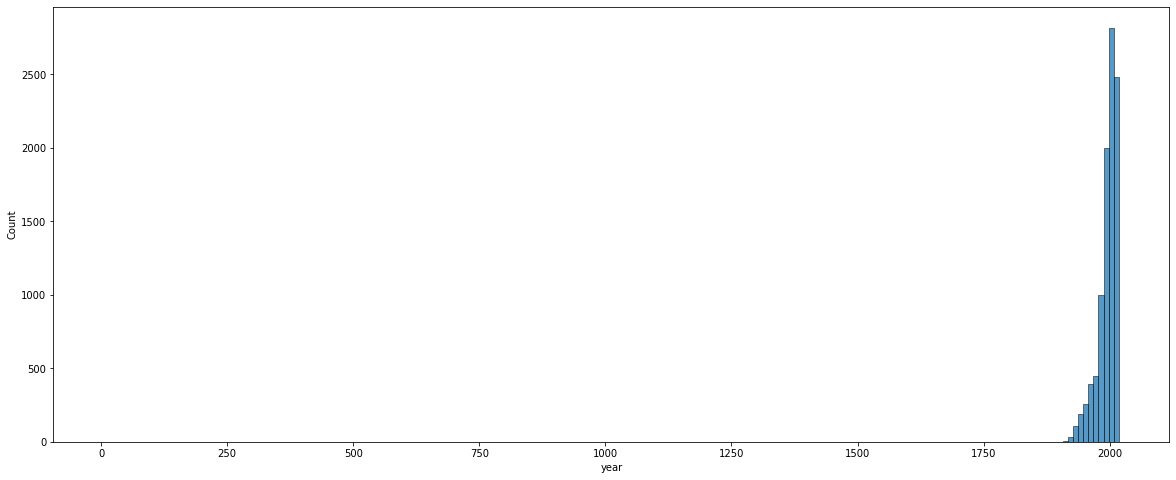

In [20]:
#Memvisualisasikan tahun
plt.figure(figsize=(20,8))
sns.histplot(data = df_movie, x = 'year', bins = 200)
plt.show()

In [21]:
# Mengambil column genres dan melakukan encoding
genres = []
for i in range(len(df_movie.genres)):
  for x in df_movie.genres[i].split('|'):
    if x not in genres:
      genres.append(x)

len(genres)
for x in genres:
    df_movie[x] = 0
for i in range(len(df_movie.genres)):
    for x in df_movie.genres[i].split('|'):
        df_movie[x][i]=1

df_movie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
9698,184997,"Love, Simon (2018)",Comedy|Drama,2018.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9701,185033,I Kill Giants (2018),Drama|Fantasy|Thriller,2018.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9686,184015,When We First Met (2018),Comedy,2018.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9712,188189,Sorry to Bother You (2018),Comedy|Fantasy|Sci-Fi,2018.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9711,187717,Won't You Be My Neighbor? (2018),Documentary,2018.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,171495,Cosmos,(no genres listed),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9518,171749,Death Note: Desu nôto (2006–2007),(no genres listed),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9525,171891,Generation Iron 2,(no genres listed),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
#memvisualisasikan genre
genre_visualization = df_movie.drop('year', axis = 1)
genre_visualization = genre_visualization.iloc[:,3:].sum().reset_index()
genre_visualization.columns = ['genre','total'] 
print(genre_visualization)
print('\n')
print(genres)

                 genre  total
0            Adventure   1263
1            Animation    611
2             Children    664
3               Comedy   3756
4              Fantasy    779
5              Romance   1596
6                Drama   4361
7               Action   1828
8                Crime   1199
9             Thriller   1894
10              Horror    978
11             Mystery    573
12              Sci-Fi    980
13                 War    382
14             Musical    334
15         Documentary    440
16                IMAX    158
17             Western    167
18           Film-Noir     87
19  (no genres listed)     34


['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


<function matplotlib.pyplot.plot>

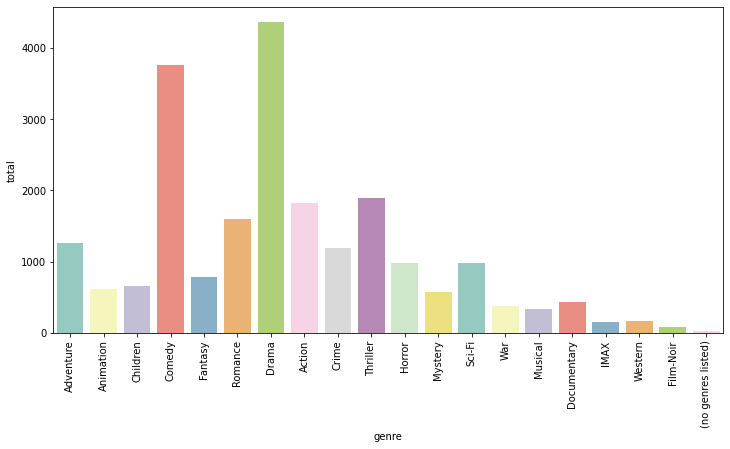

In [23]:
#Masih memvisualisasikan Genre
plt.figure(figsize=(12,6))
sns.barplot(x = 'genre', y = 'total', data = genre_visualization, palette = 'Set3')
plt.xticks(rotation = 90)
plt.plot

In [24]:
#Menggabungkan dua dataframe untuk visualisasi rating tertinggi per title
data = pd.merge(df_movie, df_rating, on = 'movieId')
data = data.drop(genres, axis = 1)
data

,movieId,title,genres,year,userId,rating,timestamp
0,184997,"Love, Simon (2018)",Comedy|Drama,2018.0,596,4.0,1535828629
1,185033,I Kill Giants (2018),Drama|Fantasy|Thriller,2018.0,514,2.0,1533947134
2,184015,When We First Met (2018),Comedy,2018.0,111,3.5,1518640587
3,184015,When We First Met (2018),Comedy,2018.0,249,3.5,1518883048
4,188189,Sorry to Bother You (2018),Comedy|Fantasy|Sci-Fi,2018.0,462,4.5,1533519140
...,...,...,...,...,...,...,...
100831,171495,Cosmos,(no genres listed),NaN,599,4.0,1519116912
100832,171631,Maria Bamford: Old Baby,(no genres listed),NaN,111,1.0,1517440909
100833,171749,Death Note: Desu nôto (2006–2007),(no genres listed),NaN,105,5.0,1526207365
100834,171891,Generation Iron 2,(no genres listed),NaN,111,3.5,1517440199


In [25]:
# Melihat rating per-title tertinggi
visualisasi = data.groupby('title')['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})
visualisasi = visualisasi.sort_values(by = 'total_rating', ascending = False)
visualisasi.head(10)

,title,total_rating
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
8001,Star Wars: Episode IV - A New Hope (1977),251
4662,Jurassic Park (1993),238
1337,Braveheart (1995),237
8363,Terminator 2: Judgment Day (1991),224
7421,Schindler's List (1993),220


<function matplotlib.pyplot.plot>

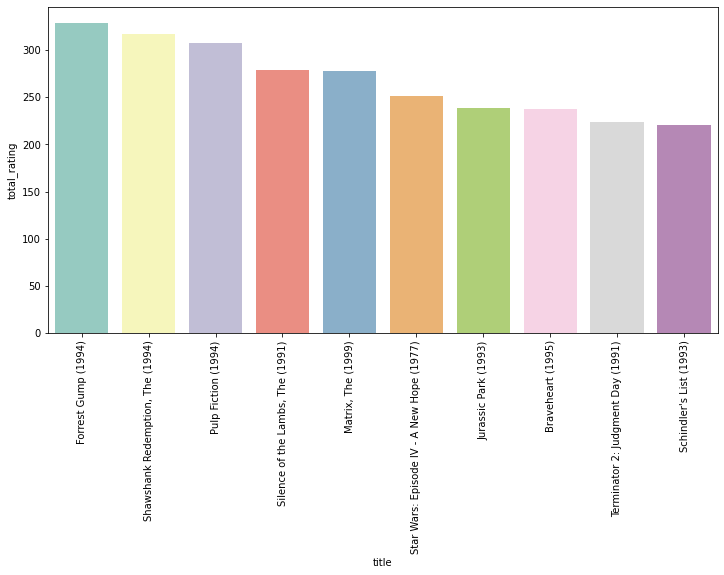

In [26]:
#visualisasi 10 titel dengan rating terbanyak
plt.figure(figsize=(12,6))
sns.barplot(x = 'title', y = 'total_rating', data = visualisasi.iloc[:10,:], palette = "Set3")
plt.xticks(rotation = 90)
plt.plot

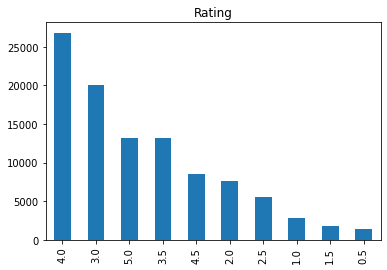

In [27]:
# Visualisasi rating dari rating dataframe
rating = df_rating['rating'].value_counts()
rating.plot(kind = 'bar', title = "Rating")
plt.show()

## Data Preparation

Hal yang akan digunakan untuk data preparation ini adalah#
1. Mengecek dan menghilangkan data duplikat
2. Menghilangkan data Null
3. Menghilangkan variabel yang tidak dibutuhkan lagi
4. Preparation for Cosine Similarity
5. Preparation for Deep Learning

In [28]:
#Cek data duplikat
print(df_movie[df_movie.duplicated()])
print(df_rating[df_rating.duplicated()])
print(df_tags[df_tags.duplicated()])
print(df_links[df_links.duplicated()])

Empty DataFrame
Columns: [movieId, title, genres, year, Adventure, Animation, Children, Comedy, Fantasy, Romance, Drama, Action, Crime, Thriller, Horror, Mystery, Sci-Fi, War, Musical, Documentary, IMAX, Western, Film-Noir, (no genres listed)]
Index: []
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []
Empty DataFrame
Columns: [userId, movieId, tag, timestamp]
Index: []
Empty DataFrame
Columns: [movieId, imdbId, tmdbId]
Index: []


In [29]:
#Cek data null
print(df_movie.isnull().sum())
print('\n')
print(df_rating.isnull().sum())
print('\n')
print(df_tags.isnull().sum())
print('\n')
print(df_links.isnull().sum())

movieId                0
title                  0
genres                 0
year                  13
Adventure              0
Animation              0
Children               0
Comedy                 0
Fantasy                0
Romance                0
Drama                  0
Action                 0
Crime                  0
Thriller               0
Horror                 0
Mystery                0
Sci-Fi                 0
War                    0
Musical                0
Documentary            0
IMAX                   0
Western                0
Film-Noir              0
(no genres listed)     0
dtype: int64


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [30]:
#Karena kita tidak membutuhkan column Tahun, kita drop column tahun

df_movie = df_movie.drop('year', axis = 1)

In [31]:
#data_preparation for cosine similarity

from scipy.sparse import csr_matrix
df_cosine = df_movie.drop(['movieId', 'genres'], axis = 1)
df_cosine = df_cosine.set_index('title')
df_cosine = csr_matrix(df_cosine.values)
print(df_cosine)

  (0, 3)	1
  (0, 6)	1
  (1, 4)	1
  (1, 6)	1
  (1, 9)	1
  (2, 3)	1
  (3, 3)	1
  (3, 4)	1
  (3, 12)	1
  (4, 15)	1
  (5, 0)	1
  (5, 2)	1
  (5, 7)	1
  (5, 12)	1
  (6, 3)	1
  (6, 7)	1
  (6, 12)	1
  (7, 0)	1
  (7, 1)	1
  (7, 2)	1
  (7, 7)	1
  (8, 0)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  :	:
  (9726, 0)	1
  (9726, 4)	1
  (9726, 7)	1
  (9726, 12)	1
  (9727, 3)	1
  (9727, 5)	1
  (9727, 6)	1
  (9728, 5)	1
  (9728, 6)	1
  (9729, 12)	1
  (9730, 7)	1
  (9730, 9)	1
  (9730, 12)	1
  (9731, 19)	1
  (9732, 19)	1
  (9733, 6)	1
  (9733, 9)	1
  (9734, 19)	1
  (9735, 6)	1
  (9736, 19)	1
  (9737, 19)	1
  (9738, 19)	1
  (9739, 19)	1
  (9740, 19)	1
  (9741, 19)	1


In [32]:
#Data Preparation for deep learning

#User_ID Prep
user_id = data['userId'].unique().tolist()
user_to_encoded = {x: i for i, x in enumerate(user_id)}
encoded_to_user = {i: x for i, x in enumerate(user_id)}

#Movie_ID Prep
movie_id = data['movieId'].unique().tolist()
movie_to_encoded = {x: i for i, x in enumerate(movie_id)}
encoded_to_movie = {i: x for i, x in enumerate(movie_id)}

#mapping
data['user'] = data['userId'].map(user_to_encoded)
data['movie'] = data['movieId'].map(movie_to_encoded)

#visualize
data

,movieId,title,genres,year,userId,rating,timestamp,user,movie
0,184997,"Love, Simon (2018)",Comedy|Drama,2018.0,596,4.0,1535828629,0,0
1,185033,I Kill Giants (2018),Drama|Fantasy|Thriller,2018.0,514,2.0,1533947134,1,1
2,184015,When We First Met (2018),Comedy,2018.0,111,3.5,1518640587,2,2
3,184015,When We First Met (2018),Comedy,2018.0,249,3.5,1518883048,3,2
4,188189,Sorry to Bother You (2018),Comedy|Fantasy|Sci-Fi,2018.0,462,4.5,1533519140,4,3
...,...,...,...,...,...,...,...,...,...
100831,171495,Cosmos,(no genres listed),NaN,599,4.0,1519116912,29,9719
100832,171631,Maria Bamford: Old Baby,(no genres listed),NaN,111,1.0,1517440909,2,9720
100833,171749,Death Note: Desu nôto (2006–2007),(no genres listed),NaN,105,5.0,1526207365,46,9721
100834,171891,Generation Iron 2,(no genres listed),NaN,111,3.5,1517440199,2,9722


In [33]:
# Mendapatkan jumlah user
num_users = len(user_to_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
data['rating'] = data['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(data['rating'])
 
# Nilai maksimal rating
max_rating = max(data['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


In [34]:
# Kita gabungin lah si user dan movie
x = data[['user', 'movie']].values


#Variabel y untuk rating dari hasil
y = data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

#bagi data jadi 80%
deep_learning = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:deep_learning],
    x[deep_learning:],
    y[:deep_learning],
    y[deep_learning:]
)


## Modeling dan Result

### Modeling for Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_model = cosine_similarity(df_cosine)
cosine_sim = pd.DataFrame(cosine_model, index = df_movie['title'], columns = df_movie['title'])

print('Shape:', cosine_sim.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim.sample(5, axis=1).sample(10, axis=0)

Shape: (9742, 9742)


title,Body (2015),Sophie's Choice (1982),My Life in Pink (Ma vie en rose) (1997),Sherlock Holmes (2009),"Wedding Singer, The (1998)"
title,,,,,
Picnic at Hanging Rock (1975),0.408248,0.707107,0.500000,0.353553,0.000000
Last Days (2005),0.577350,1.000000,0.707107,0.000000,0.000000
Gorgeous (Boh lee chun) (1999),0.000000,0.000000,0.408248,0.288675,0.816497
Phantasm IV: Oblivion (1998),0.577350,0.000000,0.000000,0.000000,0.000000
Jamaica Inn (1939),0.577350,1.000000,0.707107,0.000000,0.000000
Changing Lanes (2002),0.816497,0.707107,0.500000,0.353553,0.000000
Vagabond (Sans toit ni loi) (1985),0.577350,1.000000,0.707107,0.000000,0.000000
The Forbidden Dance (1990),0.000000,0.000000,0.000000,0.000000,0.000000
Shooting Fish (1997),0.000000,0.000000,0.500000,0.000000,1.000000


In [36]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim, items = df_movie[['title', 'genres', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

#### Testing and Evaluationg the Model

In [37]:
movie = resto_recommendations('The Darkest Minds (2018)')
movie

,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,ARQ (2016),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,Project Almanac (2015),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,"Signal, The (2014)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,"Incredible Shrinking Man, The (1957)",Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Sphere (1998),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [38]:
retro = df_movie[df_movie['title'] == 'The Darkest Minds (2018)']
get_genre = [i for i in genres if retro[i].values == 1]
df_movie[df_movie['title'] == 'The Darkest Minds (2018)']["Sci-Fi"].values[0]

1

In [39]:
def accurate (name ):
  retro = df_movie[df_movie['title'] == name]
  get_genre = [i for i in genres if retro[i].values == 1]
  sum = float(0)
  for j in get_genre :
    print("The accuracy of "+ j+" : " + str((movie[j].sum()/len(movie[j]))*100) + "%")

In [40]:
accurate('The Darkest Minds (2018)')

The accuracy of Thriller : 100.0%
The accuracy of Sci-Fi : 100.0%


### Model Training for Deep Learning

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings resto
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_resto + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [42]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 25,
    validation_data = (x_val, y_val),
)


Epoch 1/25
10084/10084 [==============================] - 67s 6ms/step - loss: 0.6299 - root_mean_squared_error: 0.2189 - val_loss: 0.6684 - val_root_mean_squared_error: 0.2840
Epoch 2/25
10084/10084 [==============================] - 65s 6ms/step - loss: 0.6102 - root_mean_squared_error: 0.1971 - val_loss: 0.6638 - val_root_mean_squared_error: 0.2799
Epoch 3/25
10084/10084 [==============================] - 63s 6ms/step - loss: 0.6059 - root_mean_squared_error: 0.1919 - val_loss: 0.6578 - val_root_mean_squared_error: 0.2746
Epoch 4/25
10084/10084 [==============================] - 64s 6ms/step - loss: 0.6037 - root_mean_squared_error: 0.1892 - val_loss: 0.6524 - val_root_mean_squared_error: 0.2699
Epoch 5/25
10084/10084 [==============================] - 64s 6ms/step - loss: 0.6021 - root_mean_squared_error: 0.1873 - val_loss: 0.6475 - val_root_mean_squared_error: 0.2655
Epoch 6/25
10084/10084 [==============================] - 64s 6ms/step - loss: 0.6012 - root_mean_squared_error: 0.

#### Testing and Evaluation the Model

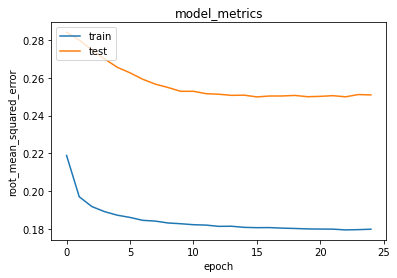

In [43]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
movie_df = df_movie

 
# Mengambil sample user
user_id = data.userId.sample(1).iloc[0]
movie_visited_by_user = data[data.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['movieId'].isin(movie_visited_by_user.movieId.values)]['movieId'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_encoded.keys()))
)
 
movie_not_visited = [[movie_to_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [45]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
 
top_movie_recommend = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = df_movie[df_movie['movieId'].isin(top_movie_recommend)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)
 
print('----' * 8)
print('Top 10 Moive')
print('----' * 8)
 
recommended_movie = df_movie[df_movie['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

Showing recommendations for users: 387
Old Boy (2003) : Mystery|Thriller
Apocalypse Now (1979) : Action|Drama|War
2001: A Space Odyssey (1968) : Adventure|Drama|Sci-Fi
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) : Comedy|War
Vertigo (1958) : Drama|Mystery|Romance|Thriller
--------------------------------
Top 10 Moive
--------------------------------
Three Billboards Outside Ebbing, Missouri (2017) : Crime|Drama
What We Do in the Shadows (2014) : Comedy|Horror
Tekkonkinkreet (Tekkon kinkurîto) (2006) : Action|Adventure|Animation|Crime|Fantasy
Sophie Scholl: The Final Days (Sophie Scholl - Die letzten Tage) (2005) : Drama|War
Memories of Murder (Salinui chueok) (2003) : Crime|Drama|Mystery|Thriller
Band of Brothers (2001) : Action|Drama|War
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997) : Action|Animation|Drama|Fantasy|Sci-Fi
Secrets & Lies (1996) : Drama
Whole Wide World, The (1996) : Dra